WIKILAB https://eeglab.org

BOOK: An Introduction to the Event-Related Potential Technique, Second Edition


In [9]:

import scipy.io as sio
import matplotlib.pyplot as plt

In [10]:
# Loading the .mat file
data = sio.loadmat("/Users/minolidissanayake/Desktop/Keele/Modules/SEM 3/Dataset/Control_part1/v56p.mat")  

# Access the EEG data
eeg_data = data['v56p']

# Print the shape of the EEG data
print(f"Shape of eeg_data: {eeg_data.shape}")

# Get the dimensions of the data
n_channels = eeg_data.shape[0]
n_time_samples = eeg_data.shape[1]


print(f"channels: {n_channels}, time samples: {n_time_samples}")

Shape of eeg_data: (14139, 19)
channels: 14139, time samples: 19


In [11]:
#Process EEG data using MNE library
import mne

#MNE information object creation
sampling_rate = 256  # sampling rate of your data
info = mne.create_info(ch_names=[f"ch_{i + 1}" for i in range(n_channels)],
                       sfreq=sampling_rate,
                       ch_types='eeg')


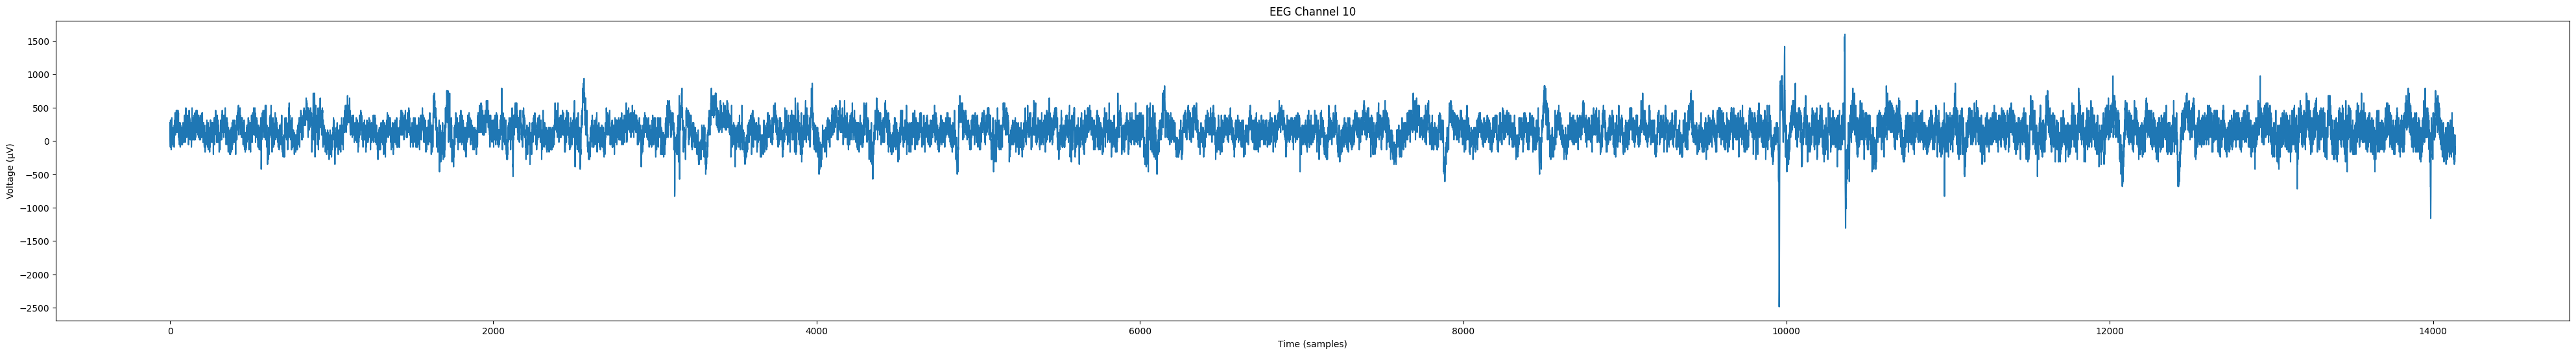

Creating RawArray with float64 data, n_channels=14139, n_times=19
    Range : 0 ... 18 =      0.000 ...     0.070 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 48.00 Hz
- Upper transition bandwidth: 12.00 Hz (-6 dB cutoff frequency: 54.00 Hz)
- Filter length: 845 samples (3.301 s)



/var/folders/yf/bgp5b0vn4jg1ss5l0h0hhdt40000gn/T/ipykernel_85904/2039821489.py:27: RuntimeWarning: filter_length (845) is longer than the signal (19), distortion is likely. Reduce filter length or filter a longer signal.
  raw.filter(l_freq=1.0, h_freq=48.0)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 449 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 881 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1151 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1457 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 1799 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2177 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done 2591 tasks      | elapsed:    0.2s
[Par

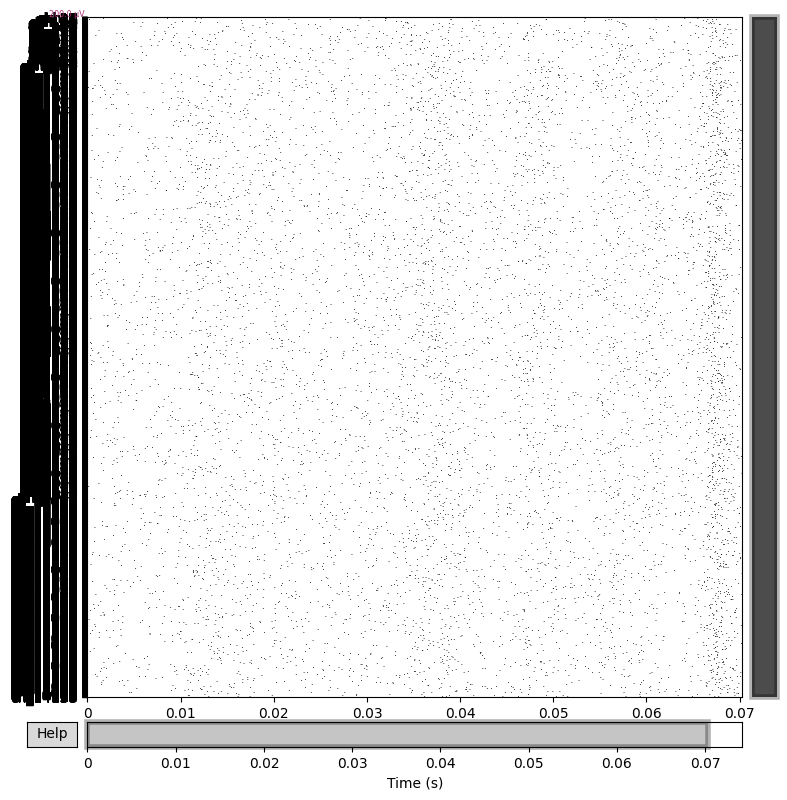

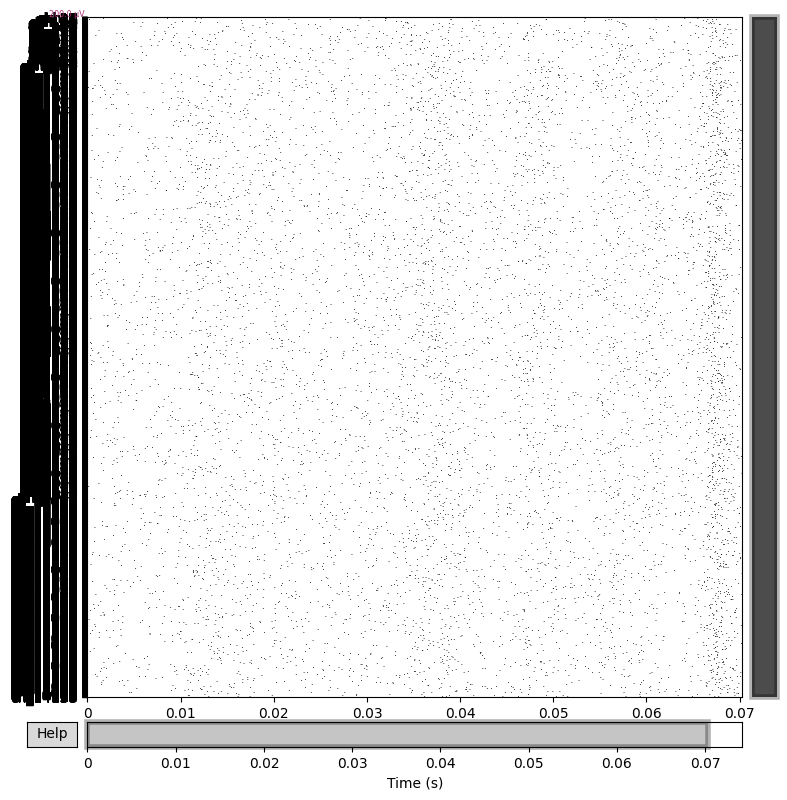

In [12]:
# List of 19 channel names based on the 10-20 system
channel_names = [
    'Fz', 'Cz', 'Pz', 'C3', 'T3', 'C4', 'T4', 'Fp1', 'Fp2', 
    'F3', 'F4', 'F7', 'F8', 'P3', 'P4', 'T5', 'T6', 'O1', 'O2'
]

# Ensure the channel list length matches the number of channels in eeg_data
assert len(channel_names) == eeg_data.shape[1], "Channel names list length must match the number of channels in EEG data."

# Plotting the EEG data for a single channel
channel = 9  # Channel selection
#time = range(eeg_data.shape[1])  
time = range(eeg_data.shape[0])  

plt.figure(figsize=(50, 6))
# plt.plot(time, eeg_data["channel", :])
plt.plot(time, eeg_data[:, channel])
plt.xlabel('Time (samples)')
plt.ylabel('Voltage (μV)')
plt.title(f'EEG Channel {channel + 1}')
plt.show()

# Creating raw MNE object
raw = mne.io.RawArray(eeg_data, info)

# Applying a bandpass filter from 1Hz to 48Hz
raw.filter(l_freq=1.0, h_freq=48.0)

# Plotting the raw object
raw.plot(duration=60.0, scalings={'eeg': 100e-6}, n_channels=n_channels)

Creating RawArray with float64 data, n_channels=14139, n_times=19
    Range : 0 ... 18 =      0.000 ...     0.070 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 48 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 1.00, 48.00 Hz: -6.02, -6.02 dB



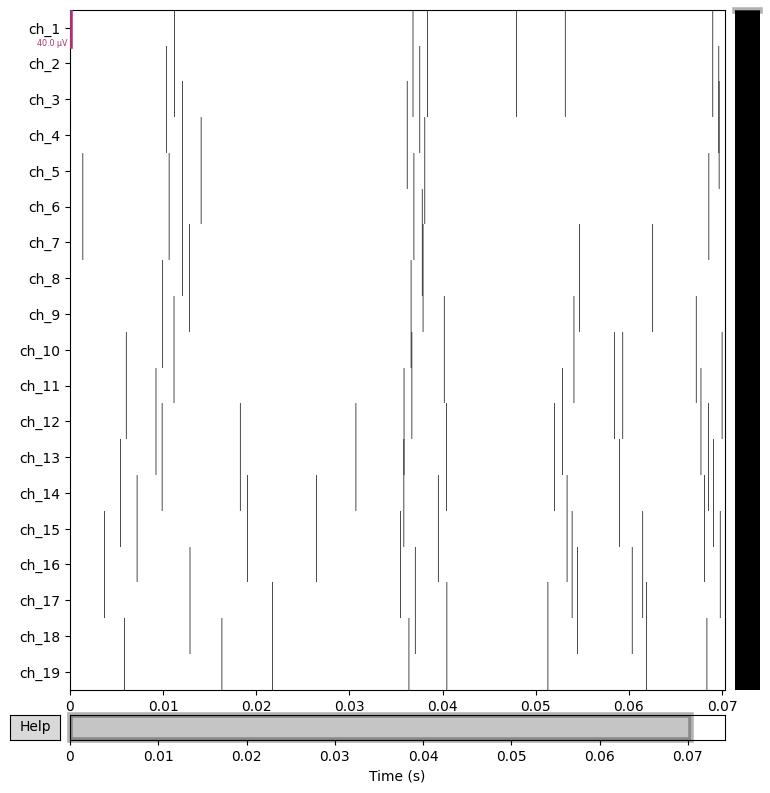

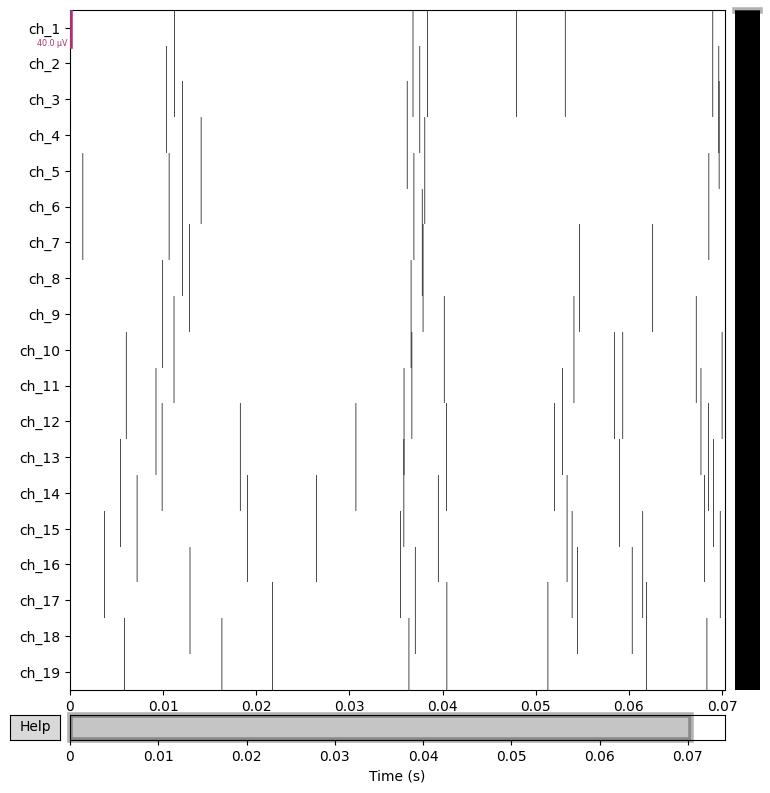

In [13]:
#creating raw mne object
raw = mne.io.RawArray(eeg_data, info)

#Applying a bandpass filter as performed in the study from 1Hz to 48Hz
raw.filter(1, 48, method='iir')

#Plot
raw.plot(duration=60.0, scalings={'eeg': 20e-6}, n_channels=19)
